## Flight price Prediction

 Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.


Predicting The Price Of A Flight Ticket With The Use Of Machine Learning Algorithms. Here we will be using two datasets — Train data and Test data



In [62]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV , train_test_split

In [2]:
# Loading train and test dataset

df = pd.read_excel('air_train.xlsx')

df1 = pd.read_excel('air_test.xlsx')

In [3]:
# View the top five rows in the dataset

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# View the top five rows in the test dataset

df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
# Display rows and columns in the dataset

df.shape

(10683, 11)

In [6]:
df1.shape

(2671, 10)

In [7]:
# Check datattypes of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
# Descriptive statistics summary of the dataset

df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.dropna(inplace=True)

In [10]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [11]:
df1.dropna(inplace=True)

In [12]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
# train
df['Journey_month'] = pd.to_datetime(df["Date_of_Journey"]).dt.month
df['Journey_Day'] = pd.to_datetime(df["Date_of_Journey"]).dt.day

df["Dep_Time_hr"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Time_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Arrival_Time_hr"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Time_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


# test
df1['Journey_month'] = pd.to_datetime(df["Date_of_Journey"]).dt.month
df1['Journey_Date'] = pd.to_datetime(df["Date_of_Journey"]).dt.day

df1["Dep_Time_hr"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df1["Dep_Time_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df1["Arrival_Time_hr"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df1["Arrival_Time_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [14]:
df.drop(["Date_of_Journey","Dep_Time","Arrival_Time","Additional_Info","Route"], axis=1, inplace=True)
df1.drop(["Date_of_Journey","Dep_Time","Arrival_Time","Additional_Info","Route"], axis=1, inplace=True)

In [15]:
le = LabelEncoder()

df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_Day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15


In [16]:
df["Source"]=le.fit_transform(df["Source"])
df["Destination"] = le.fit_transform(df["Destination"])

df1["Source"]=le.fit_transform(df1["Source"])
df1["Destination"] = le.fit_transform(df1["Destination"])

In [17]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_Day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,0,5,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,3,0,7h 25m,2 stops,7662,1,5,5,50,13,15


In [18]:
print(df.Airline.value_counts())
print(df1.Airline.value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dt

In [19]:
# Mapping the stop columns

stop = {"non-stop":0,
        "1 stop":1,
        "2 stops":2,
        "3 stops":3,
        "4 stops":4}

df.loc[:, "Total_Stops"] = df["Total_Stops"].map(stop)
df1.loc[:, "Total_Stops"] = df["Total_Stops"].map(stop)

In [20]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_Day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,0,5,2h 50m,0,3897,3,24,22,20,1,10
1,Air India,3,0,7h 25m,2,7662,1,5,5,50,13,15


In [21]:
#change of duration into hr and min
#train

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [22]:
#test
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours_t = []
duration_mins_t = []
for i in range(len(duration)):
    duration_hours_t.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins_t.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [23]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [24]:
df1["Duration_hours"] = duration_hours_t
df1["Duration_mins"] = duration_mins_t

In [25]:
df.drop(["Duration"] , axis =1 , inplace =True)
df1.drop(["Duration"] , axis =1 , inplace =True)

In [26]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [27]:
df = df[df.Airline != 'Multiple carriers Premium economy']
df = df[df.Airline != 'Jet Airways Business']
df = df[df.Airline != 'Vistara Premium economy']



df1 = df1[df1.Airline != 'Multiple carriers Premium economy']
df1 = df1[df1.Airline != 'Jet Airways Business']
df1 = df1[df1.Airline != 'Vistara Premium economy']


df

,Airline,Source,Destination,Total_Stops,Price,Journey_month,Journey_Day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,0,5,0,3897,3,24,22,20,1,10,2,50
1,Air India,3,0,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2,1,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,3,0,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,0,5,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,3,0,0,4107,9,4,19,55,22,25,2,30
10679,Air India,3,0,0,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,0,2,0,7229,4,27,8,20,11,20,3,0
10681,Vistara,0,5,0,12648,1,3,11,30,14,10,2,40


In [28]:
df = df[df.Airline != 'Trujet']


In [29]:
df.Airline.value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

In [30]:
#mapping

stop = {
    "Jet Airways":0,
    "IndiGo":1,
    "Air India":2,
    "Multiple carriers":3,
    "SpiceJet":4 , "Vistara":5 ,"Air Asia":6 , "GoAir":7, 
}

df.loc[: , "Airline"] = df["Airline"].map(stop)
df1.loc[: , "Airline"] = df1["Airline"].map(stop)


C:\Users\Gomathi\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
df.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_month       0
Journey_Day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [39]:
# splitting the train and test dataset

x = df.drop(["Price"],axis=1)
y= df['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [40]:
df.dropna(inplace=True)
df.isna().sum()

<ipython-input-40-22d438f18c60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_month       0
Journey_Day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [41]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_month,Journey_Day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,1,0,5,0,3897,3,24,22,20,1,10,2,50
1,2,3,0,2,7662,1,5,5,50,13,15,7,25
2,0,2,1,2,13882,9,6,9,25,4,25,19,0
3,1,3,0,1,6218,12,5,18,5,23,30,5,25
4,1,0,5,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,6,3,0,0,4107,9,4,19,55,22,25,2,30
10679,2,3,0,0,4145,4,27,20,45,23,20,2,35
10680,0,0,2,0,7229,4,27,8,20,11,20,3,0
10681,5,0,5,0,12648,1,3,11,30,14,10,2,40


In [42]:
x_train

,Airline,Source,Destination,Total_Stops,Journey_month,Journey_Day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
5499,0,2,1,2,12,6,5,30,19,0,13,30
6971,0,2,1,0,6,21,11,0,14,15,3,15
7464,1,3,0,0,6,6,11,30,14,5,2,35
4516,7,2,1,1,3,27,14,10,19,20,5,10
6331,3,2,1,1,6,24,19,0,1,30,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,2,0,4,27,6,0,8,45,2,45
79,4,1,4,0,3,21,8,20,10,35,2,15
8057,1,0,2,0,9,4,22,10,1,0,2,50
6952,1,3,0,1,9,6,15,10,20,30,5,20


In [43]:
regressor = ExtraTreesRegressor()
regressor.fit(x_train , y_train)

ExtraTreesRegressor()

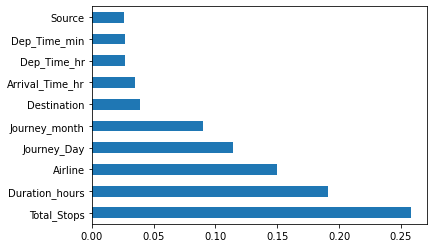

In [44]:
features = pd.Series( regressor.feature_importances_ , index = x_train.columns )
features.nlargest(10).plot(kind = "barh")
plt.show()

In [51]:
##create model
lr = LinearRegression()
rfr = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [52]:
print(lr.fit(x_train , y_train))
print(rfr.fit(x_train , y_train))
print(dt.fit(x_train , y_train))


LinearRegression()
RandomForestRegressor()
DecisionTreeRegressor()


In [54]:
# train

print(r2_score(lr.predict(x_train) , y_train))
print(r2_score(rfr.predict(x_train) , y_train))
print(r2_score(dt.predict(x_train) , y_train))


-0.11688560203520448
0.949858077059798
0.9703741070907215


In [56]:
# test

print(r2_score(lr.predict(x_test) , y_test))
print(r2_score(rfr.predict(x_test) , y_test))
print(r2_score(dt.predict(x_test) , y_test))


-0.1357759899794151
0.7622390487064127
0.6721613876442283


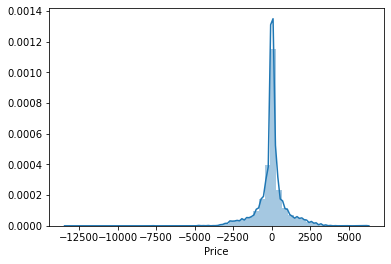

In [58]:
#check distribution
sns.distplot(rfr.predict(x_train) - y_train)

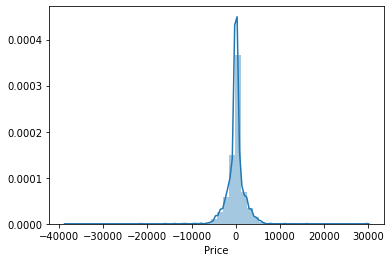

In [60]:
sns.distplot(rfr.predict(x_test) - y_test)

In [59]:
##hyper params tuning


rf_p = {
    
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200)),
    "n_estimators": list(range(1,500))
}

dt_p = {
    "criterion":["mse"],
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200))
}


In [63]:
rscv = RandomizedSearchCV(rfr , param_distributions=rf_p , cv =10 , n_iter=10  ,n_jobs = -1 , verbose = 10)

In [64]:
rscv.fit(x,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  2.4min remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 

In [65]:
rscv.best_estimator_

RandomForestRegressor(max_depth=45, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=181)

In [66]:
rfr =RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, n_estimators=69,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [67]:
rfr.fit(x_train , y_train)
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [69]:
print(r2_score(rfr.predict(x_test) , y_test))
print(r2_score(dt.predict(x_test) , y_test))

0.782115575131358
0.6705334440645021
